# Objectives

# 1. Remove stopwords and clean the tweets.
# 2. Recheck the most common words in the tweets.
# 3. Convert sentiment to a binary classification problem.
# 4. Split the data into training and testing sets.

In [1]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import save_npz

import nltk

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /home/rushikesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rushikesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:

data_path = '../data/raw/raw_tweets.csv'
df = pd.read_csv(data_path, encoding='latin-1', header=None, names=['sentiment', 'id', 'date', 'query', 'user', 'text'])

df.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
# Tokenization and Cleaning Text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)
    
    # Remove special characters, digits, and punctuations
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    text = text.lower()
    
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

# Remove Stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)


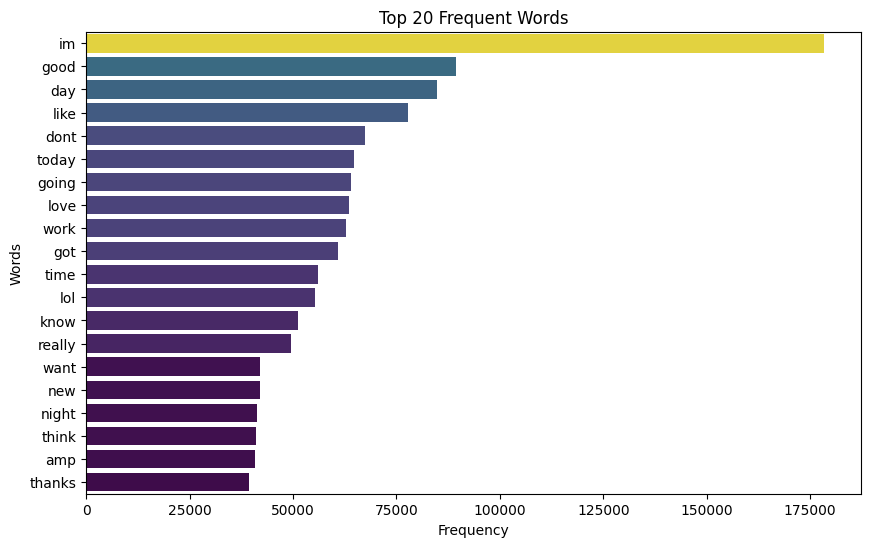

In [7]:

# Word Frequency Analysis after Cleaning
vectorizer = CountVectorizer(max_features=20, stop_words='english')
word_count_matrix = vectorizer.fit_transform(df['cleaned_text'])
word_frequencies = np.asarray(word_count_matrix.sum(axis=0)).flatten()

# Create a DataFrame of the word frequencies
word_freq_df = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'frequency': word_frequencies
})

word_freq_df.sort_values(by='frequency', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='word', data=word_freq_df.head(20), palette='viridis', hue='frequency', legend=False)
plt.title('Top 20 Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


In [4]:

# Convert Sentiment to Binary Labels
df['sentiment'] = df['sentiment'].map({0: 0, 4: 1})

X = df['cleaned_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

split_features_path = '../data/processed/X_train.npy'
split_test_features_path = '../data/processed/X_test.npy'
np.save(split_features_path, X_train)
np.save(split_test_features_path, X_test)

# Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Save the processed data
processed_data_path = '../data/processed/processed_tweets.csv'
df_processed = df[['sentiment', 'cleaned_text']]
df_processed.to_csv(processed_data_path, index=False)

# Save the transformed data for modeling
processed_features_path = '../data/processed/X_train_vect.npz'
processed_labels_path = '../data/processed/y_train.npy'
save_npz(processed_features_path, X_train_vect)
np.save(processed_labels_path, y_train)

# Save the test data for future evaluation
processed_test_features_path = '../data/processed/X_test_vect.npz'
processed_test_labels_path = '../data/processed/y_test.npy'
save_npz(processed_test_features_path, X_test_vect)
np.save(processed_test_labels_path, y_test)

print(f"Processed data saved at: {processed_data_path}")
print(f"Training features saved at: {processed_features_path}")
print(f"Training labels saved at: {processed_labels_path}")


Processed data saved at: ../data/processed/processed_tweets.csv
Training features saved at: ../data/processed/X_train_vect.npz
Training labels saved at: ../data/processed/y_train.npy
